In [2]:
import sys
sys.path.append('..')
import er_est as er
import matplotlib.pyplot as plt
import numpy as np

## Neuron-to-neuron (n2n) correlation estimators
Below I demonstrate the use of functions employed in 'The unbiased estimation of r2 between two sets of noisy neural responses' Pospisil and Bair, 2021  https://www.biorxiv.org/content/10.1101/2020.10.30.361253v1 where we develop a corrected estimator for correlation between independent noisy responses and 'Accounting for biases in the estimation of neuronal signal correlation' https://www.jneurosci.org/content/early/2021/05/11/JNEUROSCI.2775-20.2021/tab-article-info where we extend the prior estimator to the case of correlated noisy responses and apply it to find a relationship between signal correlation and tuning curve amplitude in area MT.
Please see papers and code comments for further detail.

Text(0.5, 1.0, 'neuron-to-neuron simulation')

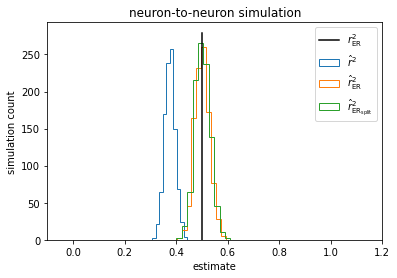

In [3]:
# %% sim n2n and hat_r2er, hat_r2er_split and r2 applied to it
r2er, sig2, d2y, n, m, n_exps = 0.5, 0.25, 200, 4, 500, 1000
d2x = d2y
x, y = er.sim_n2n(r2er, sig2, d2x, d2y, n, m, n_exps, verbose=True)
hat_r2er, hat_r2 = er.r2er_n2n(x, y)

hat_r2er_split = er.r2er_n2n_split(x, y, k_splits=100)


plt.figure()

plt.hist(hat_r2.squeeze(), histtype='step')
plt.hist(hat_r2er.squeeze(), histtype='step')
plt.hist(hat_r2er_split.squeeze(), histtype='step')
plt.xlim(-0.1, 1.2)
lly, uly = plt.gca().get_ylim()
plt.plot([r2er, r2er], [lly, uly], c='k')
plt.legend([r'$r^2_{\rm ER}$',
            r'$\hat{r}^2$',
            r'$\hat{r}^2_{\rm ER}$',
            r'$\hat{r}^2_{\rm {ER}_{\rm {split}}}$', ])
plt.xlabel('estimate')
plt.ylabel('simulation count')
plt.title(r'neuron-to-neuron simulation')

In [4]:
# %% run ecci confidence interval method n2n, it is slow
r2er, sig2, d2y, n, m, n_exps = 0.5, 0.25, 200, 4, 500, 1000
d2x = d2y
x, y = er.sim_n2n(r2er, sig2, d2x, d2y, n, m, n_exps, verbose=True)

res = er.ecci_r2er_n2n(x[0], y[0],
                       alpha_targ=0.1,
                       n_r2er_sims=1000,
                       p_thresh=0.01,
                       n_splits=6, trace=None)
ll, ul, r2er_hat_obs, trace, ll_alpha, ul_alpha = res

print('n2n ci')
print('lower  est upper')
print(np.round(ll, 2), np.round(r2er_hat_obs.squeeze(), 2), np.round(ul, 2))

n2n ci
lower  est upper
0.46 0.49 0.57


Text(0.5, 1.0, 'neuron-to-neuron alternative estimates')

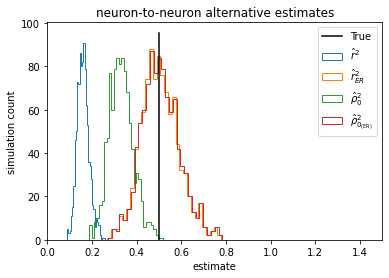

In [6]:
# %%run simulation of alternative n2n methods
r2er, sig2, d2y, n, m, n_exps = 0.5, 0.25, 40, 4, 500, 1000
d2x = d2y
x, y = er.sim_n2n(r2er, sig2, d2y, d2x, n, m, n_exps, verbose=True)
res = []
for i in range(n_exps):
    a_y = y[i]
    a_x = x[i]
    hat_r2er, hat_r2 = er.r2er_n2n(a_x, a_y)
    r2_spear_ad = er.hat_rho_0_spearman(a_x, a_y, correct_d2=False)**2
    r2_pc_er = er.hat_rho_0_spearman(a_x, a_y, correct_d2=True)**2

    res.append([np.double(hat_r2),
                np.double(hat_r2er),
                np.double(r2_spear_ad),
                np.double(r2_pc_er), ])

res = np.array(res)

plt.figure()
for i in range(4):
    plt.hist(res[:, i], histtype='step', bins=30)

leg = ['True',
       r'$\hat{r}^2$',
       r'$ \hat{r}^2_{ER}$',
       r'$\hat{\rho}^2_{ 0 }$',
       r'$\hat{\rho}^2_{0_{\rm (ER)}}$', ]

plt.xlim(0, 1.5)
lly, uly = plt.gca().get_ylim()
plt.plot([r2er, r2er], [lly, uly], c='k')
plt.legend(leg)
plt.xlabel('estimate')
plt.ylabel('simulation count')
plt.title('neuron-to-neuron alternative estimates')